In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
class BasicNN(nn.Module):
    def __init__(self):
        
        super().__init__()
        
        self.w1 = nn.Parameter(torch.tensor(1.7), requires_grad= False)
        self.w2 = nn.Parameter(torch.tensor(-40.8), requires_grad= False)
        self.w3 = nn.Parameter(torch.tensor(12.6), requires_grad= False)
        self.w4 = nn.Parameter(torch.tensor(2.7), requires_grad= False)
        
        self.b1 = nn.Parameter(torch.tensor(-0.85), requires_grad= False)
        self.b2 = nn.Parameter(torch.tensor(0.0), requires_grad= False)
        
        self.bFinal = nn.Parameter(torch.tensor(-16.), requires_grad= False)
        
    def forward(self, input):  #this name has to be named as forward
        
        
        input_top_relu = input * self.w1 + self.b1
        output_topRelu = F.relu(input_top_relu)
        scaled_relu1 = output_topRelu * self.w2
        
        input_down_relu = input * self.w3 + self.b2
        output_downRelu = F.relu(input_down_relu)
        scaled_relu2 = output_downRelu * self.w4
        
        input_to_final_relu = scaled_relu1 + scaled_relu2 + self.bFinal
        
        out = F.relu(input_to_final_relu)
        
        return out
        
        
        
        

In [22]:
model = BasicNN()
#shows the parameters of the nural networks
for name, param in model.named_parameters():
    print(name, param.data)

w1 tensor(1.7000)
w2 tensor(-40.8000)
w3 tensor(12.6000)
w4 tensor(2.7000)
b1 tensor(-0.8500)
b2 tensor(0.)
bFinal tensor(-16.)


In [23]:
input_dose = torch.linspace(0,1,11)
input_dose

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Text(0.5, 0, 'dose')

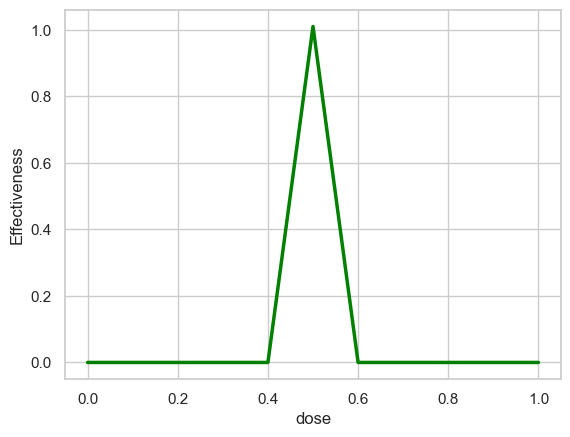

In [24]:
model = BasicNN()

output_val = model(input_dose)

sns.set(style="whitegrid")

sns.lineplot(x=input_dose, 
             y=output_val.detach(), ## NOTE: because final_bias has a gradident, we call detach() 
                                       ## to return a new tensor that only has the value and not the gradient.
             color='green', 
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('dose')


In [40]:
print(model.bFinal.data)

tensor(1.)


In [49]:
class BasicNN_train(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        
        self.w1 = nn.Parameter(torch.tensor(1.7), requires_grad= False)
        self.w2 = nn.Parameter(torch.tensor(-40.8), requires_grad= False)
        self.w3 = nn.Parameter(torch.tensor(12.6), requires_grad= False)
        self.w4 = nn.Parameter(torch.tensor(2.7), requires_grad= False)
        
        self.b1 = nn.Parameter(torch.tensor(-0.85), requires_grad= False)
        self.b2 = nn.Parameter(torch.tensor(0.0), requires_grad= False)
        
        self.bFinal = nn.Parameter(torch.tensor(1.), requires_grad= True)
        
    def forward(self,input):
        input_top_relu = input * self.w1 + self.b1
        output_topRelu = F.relu(input_top_relu)
        scaled_relu1 = output_topRelu * self.w2
        
        input_down_relu = input * self.w3 + self.b2
        output_downRelu = F.relu(input_down_relu)
        scaled_relu2 = output_downRelu * self.w4
        
        input_to_final_relu = scaled_relu1 + scaled_relu2 + self.bFinal
        
        out = F.relu(input_to_final_relu)
        
        return out
        
        
        
        

Text(0.5, 0, 'dose')

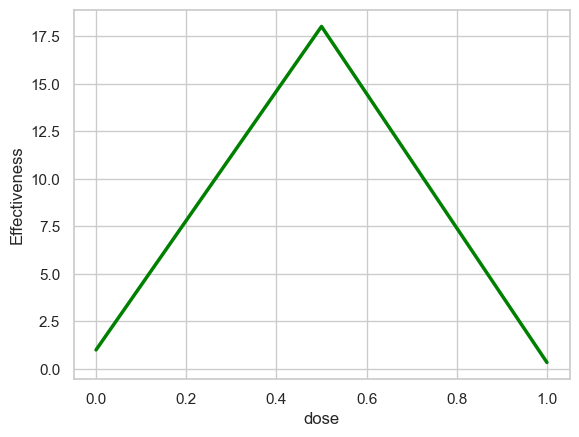

In [54]:
model = BasicNN_train()

out2 = model(input_dose)

sns.set(style="whitegrid")

sns.lineplot(x=input_dose, 
             y=out2.detach(), ## NOTE: because final_bias has a gradident, we call detach() 
                                       ## to return a new tensor that only has the value and not the gradient.
             color='green', 
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('dose')


NOW TRAIN THE NEURAL NETWORK WITH TRAINING DATA

In [55]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

NOW OPTIMIZE THE NEURAL NETWORK WITH THE DATA ABOVE

In [56]:
model = BasicNN_train()

optimizer = SGD(model.parameters(), lr = 0.1)

print('Final bias before training is', str(model.bFinal.data) + '\n')


for epoch in range(100):
    
    total_loss = 0
    
    for i in range(len(inputs)):
        
        input_i = inputs[i]
        label_i = labels[i]
        
        output_i = model(input_i)
        loss = (output_i - label_i) ** 2
        
        total_loss += float(loss)
        
        loss.backward()
        
    if total_loss<=0.001:
        
        print("Num steps: " + str(epoch))
        break
        
    optimizer.step()
    optimizer.zero_grad()
    
    print("Step: " + str(epoch) + " Final Bias: " + str(model.bFinal.data) + "\n")
    
    
print("Total loss: " + str(total_loss))
print("Final bias, after optimization: " + str(model.bFinal.data))

Final bias before training is tensor(1.)

Step: 0 Final Bias: tensor(-2.6700)

Step: 1 Final Bias: tensor(-5.3380)

Step: 2 Final Bias: tensor(-7.4724)

Step: 3 Final Bias: tensor(-9.1799)

Step: 4 Final Bias: tensor(-10.5459)

Step: 5 Final Bias: tensor(-11.6387)

Step: 6 Final Bias: tensor(-12.5130)

Step: 7 Final Bias: tensor(-13.2124)

Step: 8 Final Bias: tensor(-13.7719)

Step: 9 Final Bias: tensor(-14.2195)

Step: 10 Final Bias: tensor(-14.5776)

Step: 11 Final Bias: tensor(-14.8641)

Step: 12 Final Bias: tensor(-15.0933)

Step: 13 Final Bias: tensor(-15.2766)

Step: 14 Final Bias: tensor(-15.4233)

Step: 15 Final Bias: tensor(-15.5406)

Step: 16 Final Bias: tensor(-15.6345)

Step: 17 Final Bias: tensor(-15.7096)

Step: 18 Final Bias: tensor(-15.7697)

Step: 19 Final Bias: tensor(-15.8178)

Step: 20 Final Bias: tensor(-15.8562)

Step: 21 Final Bias: tensor(-15.8870)

Step: 22 Final Bias: tensor(-15.9116)

Step: 23 Final Bias: tensor(-15.9313)

Step: 24 Final Bias: tensor(-15.9470

Text(0.5, 0, 'dose')

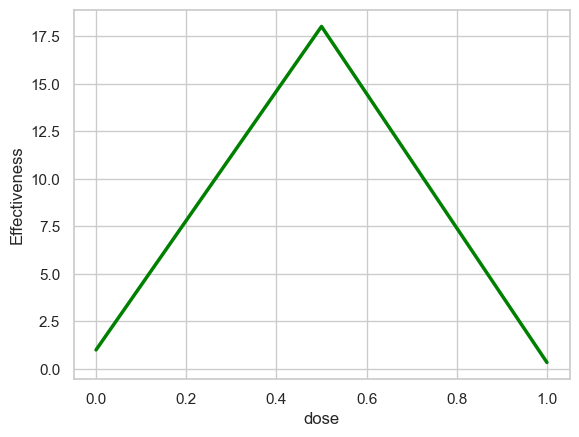

Text(0.5, 0, 'dose')

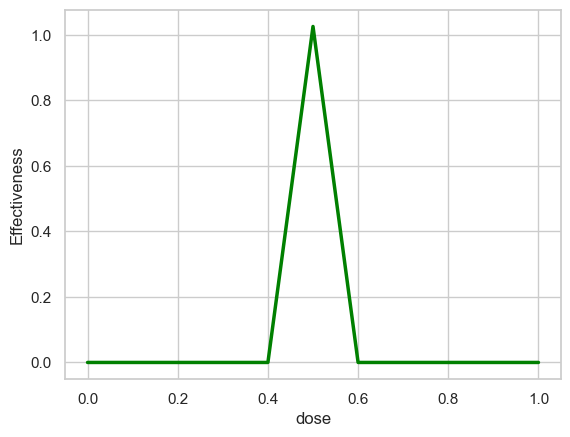

In [57]:
out2 = model(input_dose)

sns.set(style="whitegrid")

sns.lineplot(x=input_dose, 
             y=out2.detach(), ## NOTE: because final_bias has a gradident, we call detach() 
                                       ## to return a new tensor that only has the value and not the gradient.
             color='green', 
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('dose')